<a href="https://colab.research.google.com/github/wdchen2000/libgtop2.2/blob/master/PyTorchDemo_4_Gradient_Descent_with_experiment_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demo #4 - Linear Regression Custom modules



In [50]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

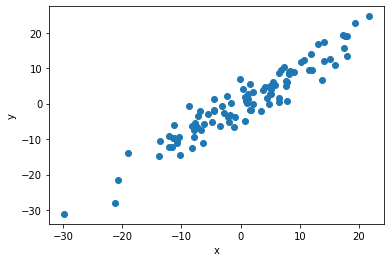

In [51]:
X = torch.randn(100, 1)*10
y = X + 3.0*torch.randn(100, 1)

plt.plot(X.numpy(), y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

### **Not sure why we use numpy() in above plot.  See next figure for the plot without numpy.  Also using 'b', 'h' will get different effect.**






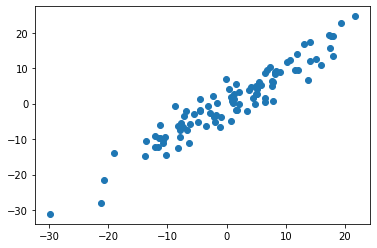

In [52]:
plt.plot(X, y, 'o')

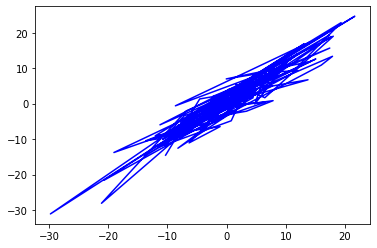

In [53]:
plt.plot(X, y, 'b')

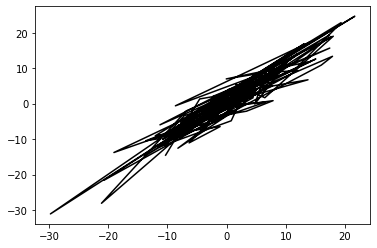

In [55]:
plt.plot(X, y, 'k')

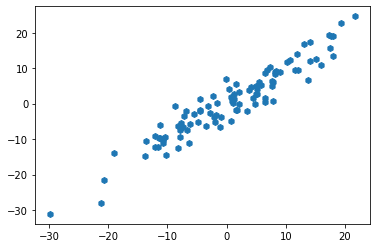

In [58]:
plt.plot(X.numpy(), y.numpy(),'h')

Dem0 4.2 Custom Dataset

In [3]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [4]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w, b] = model.parameters()
def get_params():
  return(w[0][0].item(), b[0].item())

In [6]:
def plot_fit(title):
  plt.title = title
  w1, b1= get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()


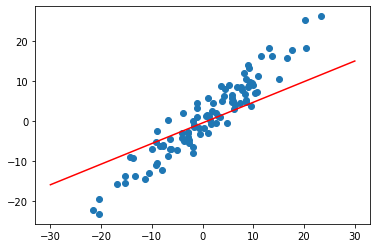

In [7]:
plot_fit('Initial Mode')

Demo 4.3  Lost Function + Gradient Descent

SGD = stochastic gradient descent (optionally with momentum)

MSELoss = mean squared error (squared L2 norm) between each element in the input :math:x and target :math:y.

In [8]:
criterion = nn.MSELoss()
c = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [9]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("Epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 loss: 28.722248077392578
Epoch: 1 loss: 19.169544219970703
Epoch: 2 loss: 14.251893043518066
Epoch: 3 loss: 11.716814994812012
Epoch: 4 loss: 10.406591415405273
Epoch: 5 loss: 9.726194381713867
Epoch: 6 loss: 9.369776725769043
Epoch: 7 loss: 9.180137634277344
Epoch: 8 loss: 9.076471328735352
Epoch: 9 loss: 9.01723575592041
Epoch: 10 loss: 8.981066703796387
Epoch: 11 loss: 8.956982612609863
Epoch: 12 loss: 8.939323425292969
Epoch: 13 loss: 8.925172805786133
Epoch: 14 loss: 8.913025856018066
Epoch: 15 loss: 8.902099609375
Epoch: 16 loss: 8.891985893249512
Epoch: 17 loss: 8.882465362548828
Epoch: 18 loss: 8.873420715332031
Epoch: 19 loss: 8.864782333374023
Epoch: 20 loss: 8.8565092086792
Epoch: 21 loss: 8.848576545715332
Epoch: 22 loss: 8.840960502624512
Epoch: 23 loss: 8.833647727966309
Epoch: 24 loss: 8.826624870300293
Epoch: 25 loss: 8.819878578186035
Epoch: 26 loss: 8.813397407531738
Epoch: 27 loss: 8.807171821594238
Epoch: 28 loss: 8.801189422607422
Epoch: 29 loss: 8.7954435